# Importing Libraries

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Importing Data from CSV to Pandas

In [54]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Pair Plot on Data 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

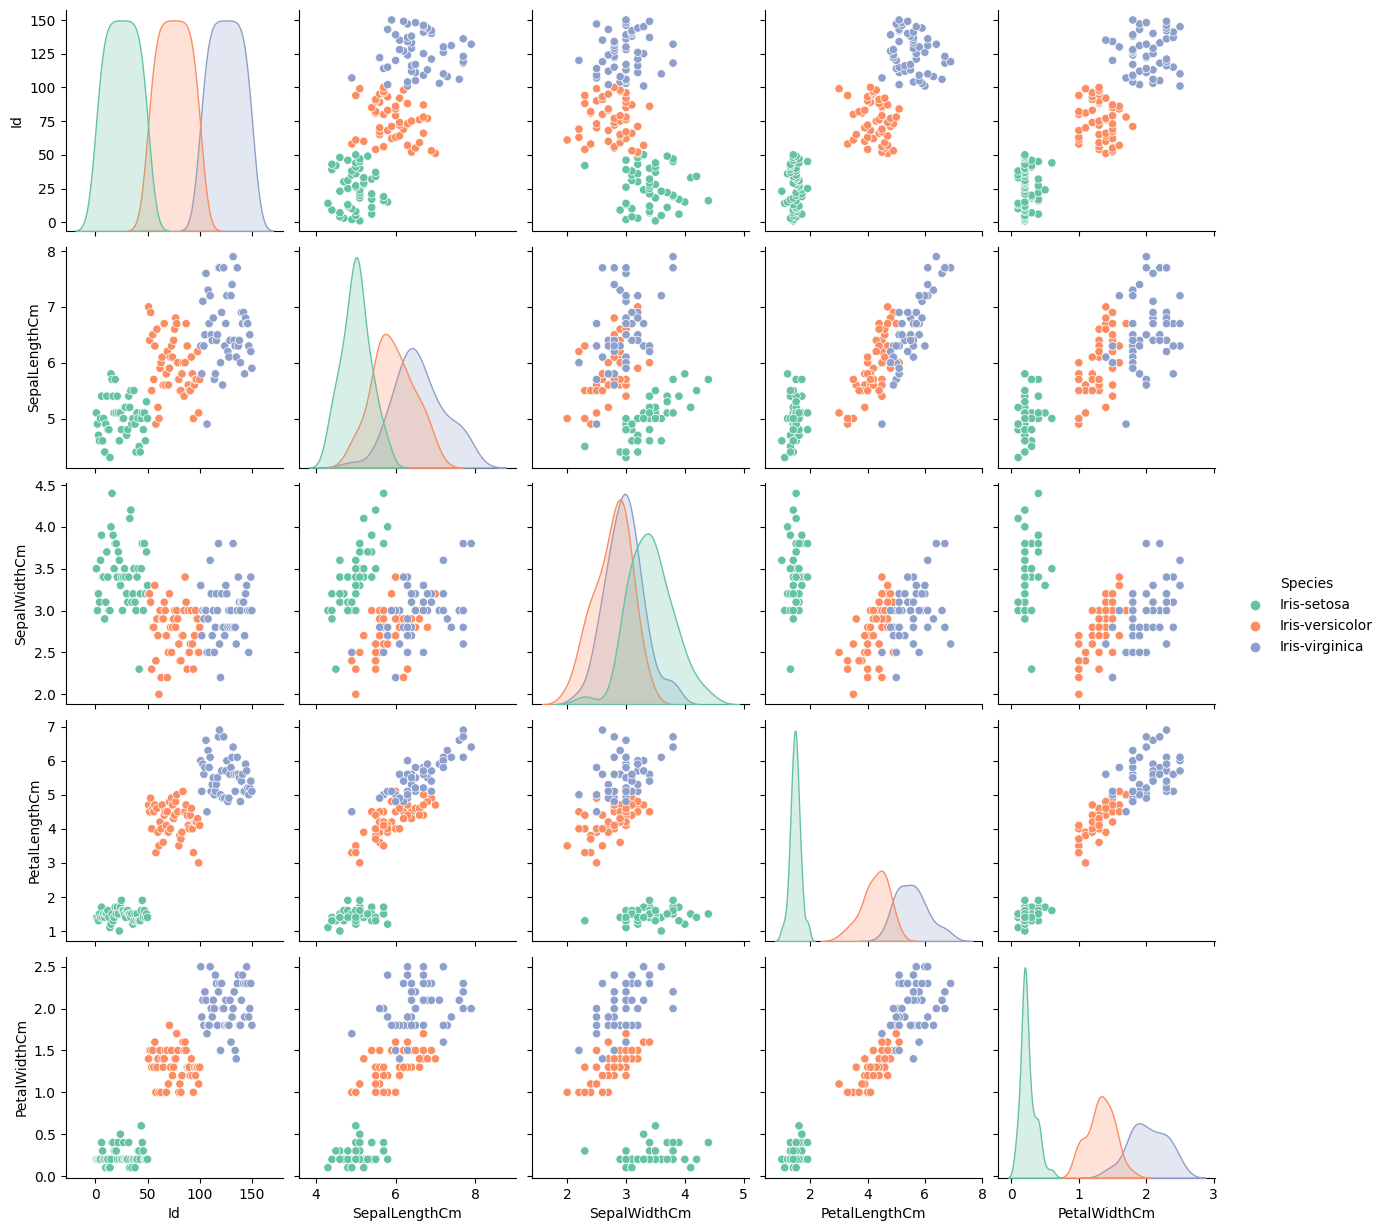

In [55]:
sns.pairplot(data=df, hue='Species', palette='Set2')

# Converting DataFrame to Numpy Array

In [56]:
df = np.asarray(df)

# Making X and y Data for Training and Testing

In [57]:
X = df[:,:-1]
y = df[:,-1]

# Splitting the data into test and train

In [58]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

# SVM Implementation

In [59]:
class SVM:
    def __init__(self, learning_rate=0.001, regularization_param=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.regularization_param = regularization_param
        self.n_iterations = n_iterations
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        self.w = np.zeros((n_classes, n_features))
        self.b = np.zeros(n_classes)
        self.w = self.w.astype(np.float64)
        for idx, y_val in enumerate(np.unique(y)):
            y_transformed = np.where(y == y_val, 1, -1)
            y_transformed = y_transformed.astype(np.float64)

            for _ in range(self.n_iterations):
                for i, x_i in enumerate(X):
                    x_i = x_i.astype(np.float64)
                    condition = y_transformed[i] * (np.dot(x_i, self.w[idx]) - self.b[idx]) >= 1
                    if condition:
                        self.w[idx] -= self.lr * (2 * self.regularization_param * self.w[idx])
                    else:
                        self.w[idx] -= self.lr * (2 * self.regularization_param * self.w[idx] - np.dot(x_i, y_transformed[i]))
                        self.b[idx] -= self.lr * y_transformed[i]

    def predict(self, X):
        scores = np.dot(X, self.w.T) - self.b
        return np.argmax(scores, axis=1)

    def accuracy(self,y_true, y_pred):
        return np.sum(y_true == y_pred) / len(y_true)

# Training Data

In [60]:
clf = SVM()
clf.fit(X_train, y_train)

# Predicting Model

In [61]:
predictions = clf.predict(X_test)
y_test = np.where(y_test == 'Iris-setosa',0,y_test)
y_test = np.where(y_test == 'Iris-versicolor',1,y_test)
y_test = np.where(y_test == 'Iris-virginica',2,y_test)

In [62]:
print(predictions)
print(y_test)
print("SVM classification accuracy:", clf.accuracy(y_test, predictions))

[2 2 2 0 2 0 2 0 1 2 0 2 2 2 2 1 1 1 0 2 1 0 0 2 1 2 0 0 2 0]
[2 2 2 0 2 0 1 0 1 2 0 2 2 1 1 1 1 1 0 1 1 0 0 2 1 2 0 0 2 0]
SVM classification accuracy: 0.8666666666666667


In [63]:
y_test = y_test.astype(np.int64)
predictions.dtype

dtype('int64')

# Classification Report

In [64]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      0.60      0.75        10\n           2       0.71      1.00      0.83        10\n\n    accuracy                           0.87        30\n   macro avg       0.90      0.87      0.86        30\nweighted avg       0.90      0.87      0.86        30\n'